# Ejercicio 2 Parcial 4 Introducción a la Teoría de Grafos

Sea $G$ un grafo conexo con dos vértices distinguidos $x$ y $y$.
1. Describa un procedimiento para encontrar $k$ caminos internamente disjuntos de $x$ a $y$, donde $k$ es tan grande como sea posible.
2. Implemente un programa para encontrar dichos $k$ caminos internamente disjuntos. Puede utilizar algún algoritmo para encontrar flujos máximos como subrutina.

## Descripción del Algoritmo

### Instrucción:

Describa un procedimiento para encontrar $k$ caminos internamente disjuntos de $x$ a $y$, donde $k$ es tan grande como sea posible.

### Propuesta:

Sea $G$ un grafo conexo con dos vértices distinguidos $x$ y $y$.
La idea general y básica del algoritmo, es crear una red que tenga como grafo "subyacente" una modificación del grafo $G$, asignando capacidad $1$ a todo vértice intermedio (para indicar solo 1 paso por él) para luego, aplicar un algoritmo de flujo máximo (posiblemente el Min Cut Max Flow Algorithm) que me regrese el flujo máximo y usarlo para crear los caminos.

Iniciaremos con un recorrido por todo el grafo desde un vértice distinguido como inicial (obtendremos el mismo resultado si los intercambiamos). Supongamos, sin pérdida de generalidad que $x$ es el tomado como inicial.

Partiendo desde $x$, haremos un recorrido por el grafo de tal manera que los vértices interno ($V(G) - \{x,y\}$) son aristas de capacidad $1$ y si una arista es incidente a dicho vértice se conecta de la cabeza a la cola de ambos vértices, con aristas de capacidad $\infty$ (no es muy relevante la capacidad de las aristas, solo vienen de $1$ extremo).

Una vez creada la red, aplicando el algoritmo de fluko máximo, reconstruiremos los caminos teniendo en cuenta que se pasa por un vértice interno si su flujo es 1.

Para el tracking ("seguimiento") de los caminos se pueden ir intercalando y solo contando los impares o si hay posibilidad llevar un label de alfabeto ($v1, v2$) y matchear letrass, o en su defecto, tomando en cuenta capacidad (a pesar de que sean caminos disjuntos por aristas, también, por conveniencia, se cambia capacidad).

In [13]:
import networkx as nx
import matplotlib.pyplot as plt

# Métodos para impresión de grafos

# Impresión de grafo inicial
def impresion_grafo(G, titulo):
    plt.figure(figsize=(10, 5))
    plt.subplot(121)
    nx.draw(G, with_labels=True, font_weight='bold')
    plt.title(titulo)
    
# Impresión de grafo de flujo con capacidad
def impresion_grafo_flujo(G, titulo):
    plt.figure(figsize=(10, 5))
    plt.subplot(122)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'capacity')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    plt.title(titulo)

# Impresión de grafo con caminos internamente disjuntos
def impresion_grafo_camino(G, titulo, caminos, colores=['r', 'b', 'g', 'y', 'm', 'c']):
    plt.figure(figsize=(10, 5))
    plt.subplot(122)
    pos = nx.spring_layout(G)
    nx.draw(G, pos, with_labels=True, font_weight='bold')
    labels = nx.get_edge_attributes(G, 'capacity')
    nx.draw_networkx_edge_labels(G, pos, edge_labels=labels)
    for i in range(len(caminos)):
        edges = [(caminos[i][j], caminos[i][j + 1]) for j in range(len(caminos[i]) - 1)]
        nx.draw_networkx_edges(G, pos, edgelist=edges, width=8, alpha=0.5, edge_color=colores[i])
    plt.title(titulo)

# Método para la reconstrucción de los caminos obtenidos 
def reconstruccion_caminos(G, x, y, cantidad, seguimiento):
    caminos = []
    for i in range(cantidad):
        camino = []
        v = x
        aux = x
        while v != y:
            if v != x:
                if seguimiento[v][str(v)+'s'] == 1:
                    aux = v
                    v = str(v)+'s'
            camino.append(aux)
            for w in G[aux]:
                if seguimiento[v][w] == 1:
                    v = w
                    break
        camino.append(y)
        caminos.append(camino)
        
        # Elimino aristas usadas
        for i in range(len(camino)-1):
            G.remove_edge(camino[i], camino[i+1])
            
    return caminos

# Método para encontrar caminos internamente disjuntos
def caminos_internamente_disjuntos(G, x, y):
    G_flujo = nx.DiGraph()
    
    # Agrego nodos distinguidos
    G_flujo.add_node(x)
    G_flujo.add_node(y)
    
    lista_nodos = list(G.nodes())
    lista_nodos.remove(x)
    lista_nodos.remove(y)
    
    # Agrego nodos internos como aristas
    for v in lista_nodos:
        G_flujo.add_edge(v, str(v)+'s', capacity=1)
    
    # Agrego aristas de G
    for e in G.edges():
        if (e[0] == x and e[1] == y) or (e[0] == y and e[1] == x):
            G_flujo.add_edge(e[0], e[1], capacity=1)
            G_flujo.add_edge(e[1], e[0], capacity=1)
        elif e[0] == x or e[0] == y:
            G_flujo.add_edge(e[0], e[1], capacity=float('inf'))
            G_flujo.add_edge(str(e[1])+'s', e[0], capacity=float('inf'))
        elif e[1] == x or e[1] == y:
            G_flujo.add_edge(str(e[0])+'s', e[1], capacity=float('inf'))
            G_flujo.add_edge(e[1], e[0], capacity=float('inf'))
        else:
            G_flujo.add_edge(str(e[0])+'s', e[1], capacity=float('inf'))
            G_flujo.add_edge(str(e[1])+'s', e[0], capacity=float('inf'))
        
    # Impresión del grafo de flujo con capacidad
    impresion_grafo_flujo(G_flujo, 'Grafo de flujo con capacidad')
        
    # Aplico algoritmo de flujo máximo
    flow_value, flow_dict = nx.maximum_flow(G_flujo, x, y)
    
    caminos = reconstruccion_caminos(G, x, y, flow_value, flow_dict)
    
    return flow_value, caminos

Cantidad de caminos internamente disjuntos: 2
Camino 1: [1, 2, 4]
Camino 2: [1, 3, 4]


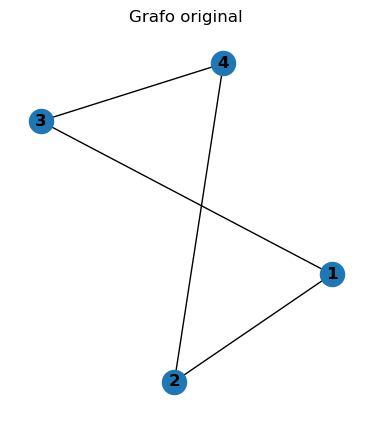

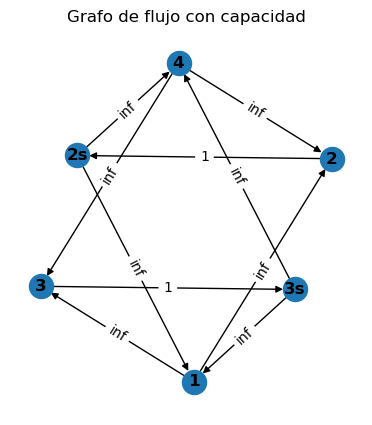

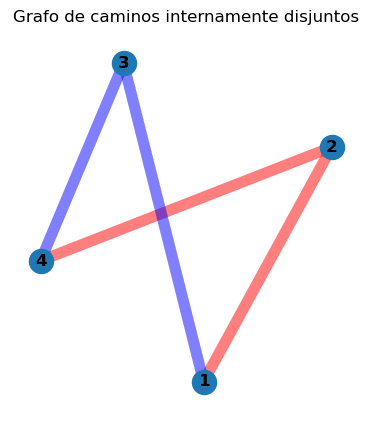

In [14]:
# Caso de prueba 1
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4])
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4)])

# Impresión del grafo original
impresion_grafo(G, 'Grafo original')

cantidad, caminos = caminos_internamente_disjuntos(G, 1, 4)

print(f"Cantidad de caminos internamente disjuntos: {cantidad}")
# Impresión de caminos internamente disjuntos
for i in range(len(caminos)):
    print(f"Camino {i+1}: {caminos[i]}")

impresion_grafo_camino(G, 'Grafo de caminos internamente disjuntos', caminos)

Cantidad de caminos internamente disjuntos: 2
Camino 1: [1, 2, 4, 6]
Camino 2: [1, 3, 5, 6]


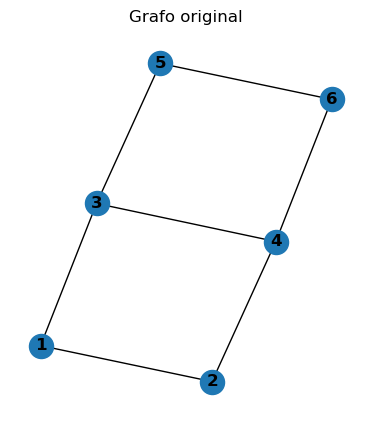

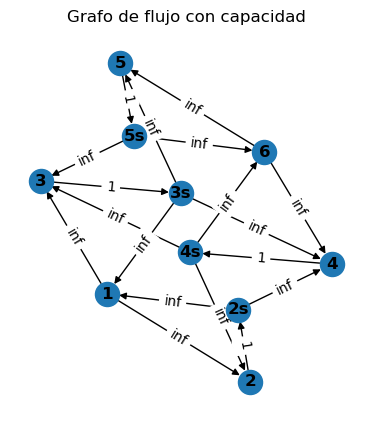

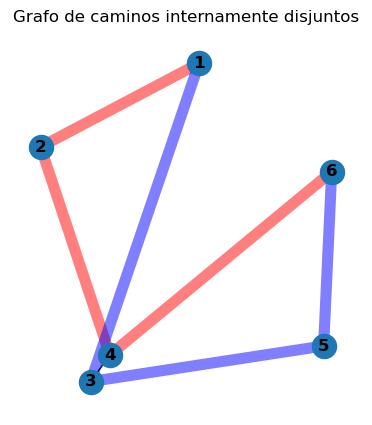

In [15]:
# Caso de prueba 2
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6])
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 6), (5, 6)])

# Impresión del grafo original
impresion_grafo(G, 'Grafo original')

cantidad, caminos = caminos_internamente_disjuntos(G, 1, 6)

print(f"Cantidad de caminos internamente disjuntos: {cantidad}")
# Impresión de caminos internamente disjuntos
for i in range(len(caminos)):
    print(f"Camino {i+1}: {caminos[i]}")
    
impresion_grafo_camino(G, 'Grafo de caminos internamente disjuntos', caminos)

Cantidad de caminos internamente disjuntos: 2
Camino 1: [1, 2, 4, 6, 8]
Camino 2: [1, 3, 5, 7, 8]


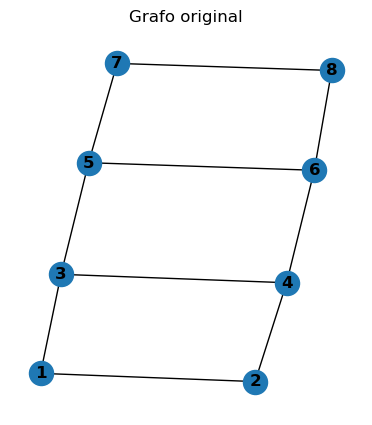

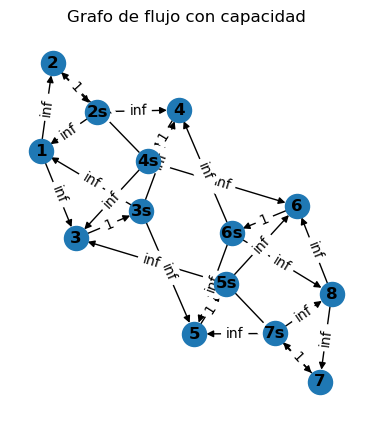

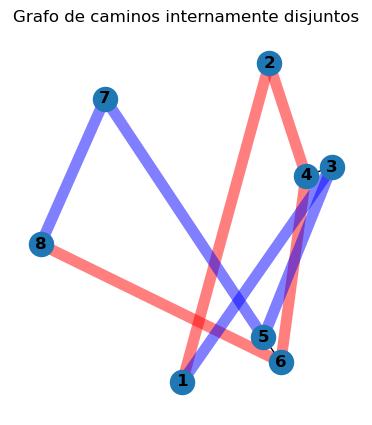

In [16]:
# Caso de prueba 3
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 6), (5, 6), (5, 7), (6, 8), (7, 8)])

# Impresión del grafo original
impresion_grafo(G, 'Grafo original')

cantidad, caminos = caminos_internamente_disjuntos(G, 1, 8)

print(f"Cantidad de caminos internamente disjuntos: {cantidad}")
# Impresión de caminos internamente disjuntos
for i in range(len(caminos)):
    print(f"Camino {i+1}: {caminos[i]}")
    
impresion_grafo_camino(G, 'Grafo de caminos internamente disjuntos', caminos)

Cantidad de caminos internamente disjuntos: 3
Camino 1: [1, 2, 4, 6, 8]
Camino 2: [1, 3, 5, 7, 8]
Camino 3: [1, 8]


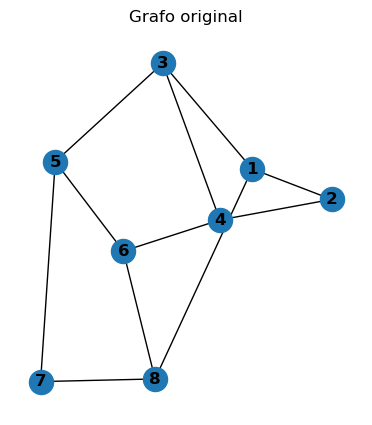

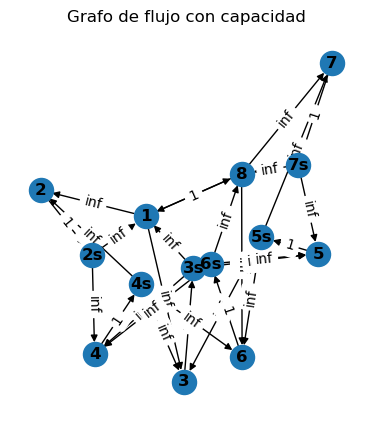

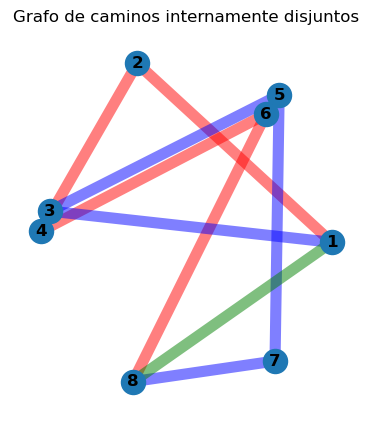

In [17]:
# Caso de prueba 4 (Con 3 caminos internamente disjuntos)
G = nx.Graph()
G.add_nodes_from([1, 2, 3, 4, 5, 6, 7, 8])
G.add_edges_from([(1, 2), (1, 3), (2, 4), (3, 4), (3, 5), (4, 6), (5, 6), (5, 7), (6, 8), (7, 8), (1, 8)])

# Impresión del grafo original
impresion_grafo(G, 'Grafo original')

cantidad, caminos = caminos_internamente_disjuntos(G, 1, 8)

print(f"Cantidad de caminos internamente disjuntos: {cantidad}")
# Impresión de caminos internamente disjuntos
for i in range(len(caminos)):
    print(f"Camino {i+1}: {caminos[i]}")
    
impresion_grafo_camino(G, 'Grafo de caminos internamente disjuntos', caminos)

### Nota:
Si se esperan más de 6 caminos internamente disjuntos, se debe cambiar el arreglo de colores en la función de impresión de caminos internamente disjuntos.